In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
%matplotlib inline
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from collections import Counter
from sklearn.svm import LinearSVC
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
business = pd.read_csv('business.csv')

In [3]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 15 columns):
Unnamed: 0      192609 non-null int64
address         184927 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192608 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     191950 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 22.0+ MB


In [4]:
business['stars'].value_counts()

4.0000    35969
3.5000    35008
5.0000    28216
4.5000    27301
3.0000    25996
2.5000    18843
2.0000    11426
1.5000     4976
1.0000     4874
Name: stars, dtype: int64

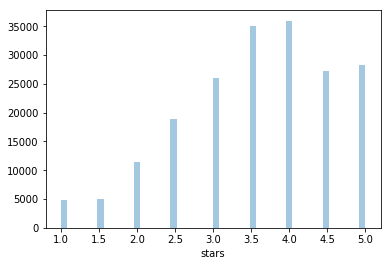

In [5]:
sns.distplot(business.stars, kde=False)

In [6]:
business.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.5221,-112.0185,Arizona Biltmore Golf Club,85016,5,3.0000,AZ
1,1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.6055,-79.6523,Emerald Chinese Restaurant,L5R 3E7,128,2.5000,ON
2,2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.0926,-80.8591,Musashi Japanese Restaurant,28210,170,4.0000,NC
3,3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.4556,-112.3956,Farmers Insurance - Paul Lorenz,85338,3,5.0000,AZ
4,4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.1900,-80.8872,Queen City Plumbing,28217,4,4.0000,NC


In [7]:
business.drop(["address", "attributes", 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name','postal_code'
              ], axis = 1 , inplace = True)

In [8]:
business.head()

,Unnamed: 0,business_id,categories,review_count,stars,state
0,0,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",5,3.0000,AZ
1,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON
2,2,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",170,4.0000,NC
3,3,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",3,5.0000,AZ
4,4,HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",4,4.0000,NC


In [9]:
us_restaurants=business.loc[business['categories'].str.contains('Restaurants',na=False)]

In [10]:
us_restaurants.head(10)


,Unnamed: 0,business_id,categories,review_count,stars,state
1,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON
2,2,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",170,4.0000,NC
11,11,1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",18,3.0000,AZ
13,13,fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",16,4.0000,OH
17,17,PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",40,4.0000,NV
23,23,1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",35,4.0000,PA
25,25,tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",184,4.5000,NV
29,29,NDuUMJfrWk52RA-H-OtrpA,"Juice Bars & Smoothies, Food, Restaurants, Fas...",57,3.0000,ON
32,32,SP_YXIEwkFPPl_9anCYmpQ,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",29,3.5000,ON
35,35,BvYU3jvGd0TJ7IyZdfiN2Q,"Sandwiches, Italian, American (Traditional), A...",16,3.5000,NC


In [11]:
us_restaurants.shape


(59371, 6)

In [12]:
us_restaurants.business_id.duplicated().sum()

0

In [13]:
us_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59371 entries, 1 to 192603
Data columns (total 6 columns):
Unnamed: 0      59371 non-null int64
business_id     59371 non-null object
categories      59371 non-null object
review_count    59371 non-null int64
stars           59371 non-null float64
state           59371 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [14]:
us_restaurants.isnull().sum()

Unnamed: 0      0
business_id     0
categories      0
review_count    0
stars           0
state           0
dtype: int64

In [15]:
yelp = pd.read_csv('review.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685902 entries, 0 to 6685901
Data columns (total 10 columns):
Unnamed: 0     object
business_id    object
cool           object
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(3), object(7)
memory usage: 510.1+ MB


In [17]:
yelp['stars'].value_counts()

5.0000    2933082
4.0000    1468985
1.0000    1002159
3.0000     739280
2.0000     542394
Name: stars, dtype: int64

In [18]:
yelp.isnull().sum()

Unnamed: 0     0
business_id    0
cool           0
date           2
funny          2
review_id      2
stars          2
text           4
useful         4
user_id        4
dtype: int64

In [19]:
## merge business table and review table
restaurants_reviews = pd.merge(us_restaurants, yelp, on = 'business_id')

In [20]:
restaurants_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201684 entries, 0 to 4201683
Data columns (total 15 columns):
Unnamed: 0_x    int64
business_id     object
categories      object
review_count    int64
stars_x         float64
state           object
Unnamed: 0_y    object
cool            object
date            object
funny           float64
review_id       object
stars_y         float64
text            object
useful          float64
user_id         object
dtypes: float64(4), int64(2), object(9)
memory usage: 512.9+ MB


In [21]:
restaurants_reviews.head()

,Unnamed: 0_x,business_id,categories,review_count,stars_x,state,Unnamed: 0_y,cool,date,funny,review_id,stars_y,text,useful,user_id
0,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,8609,0,2017-01-27 21:54:30,2.0000,6W0MQHmasK0IsaoDo4bmkw,3.0000,My girlfriend and I went for dinner at Emerald...,3.0000,2K62MJ4CJ19L8Tp5pRfjfQ
1,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,17253,0,2013-06-24 23:11:30,0.0000,BeeBfUxvzD4qNX4HxrgA5g,3.0000,We've always been there on a Sunday so we were...,0.0000,A0kENtCCoVT3m7T35zb2Vg
2,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,23456,0,2016-01-04 12:59:22,0.0000,A1D2kUnZ0HTroFreAheNSg,3.0000,"***No automatic doors, not baby friendly!*** I...",0.0000,SuOLY03LW5ZcnynKhbTydA
3,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,24704,0,2014-05-09 02:38:43,0.0000,2pf45Stf-pNew-xgTababQ,1.0000,"Horrible service,\nI went there tonight with m...",1.0000,lymyUak6KNcNKoDbK87MiQ
4,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,30636,2,2011-03-21 14:39:55,1.0000,RHhlmL07evgAdPaXQV8Omg,4.0000,One of the gauges of a good Chinese restaurant...,2.0000,6vU0I5XgCv9OQHZ76rV6qw


In [ ]:
result = restaurants_reviews.dropna(subset=['text', 'stars_y'])

In [23]:
## add column of number of words in review and label of negative and postive reviews
result['num_words_review'] = result.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# label reviews as positive or negative
result['labels'] = ''
result.loc[result.stars_y >=4, 'labels'] = 'positive'
result.loc[result.stars_y ==3, 'labels'] = 'neutral'
result.loc[result.stars_y <3, 'labels'] = 'negative'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
result.head()

,Unnamed: 0_x,business_id,categories,review_count,stars_x,state,Unnamed: 0_y,cool,date,funny,review_id,stars_y,text,useful,user_id,num_words_review,labels
0,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,8609,0,2017-01-27 21:54:30,2.0000,6W0MQHmasK0IsaoDo4bmkw,3.0000,My girlfriend and I went for dinner at Emerald...,3.0000,2K62MJ4CJ19L8Tp5pRfjfQ,228,neutral
1,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,17253,0,2013-06-24 23:11:30,0.0000,BeeBfUxvzD4qNX4HxrgA5g,3.0000,We've always been there on a Sunday so we were...,0.0000,A0kENtCCoVT3m7T35zb2Vg,84,neutral
2,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,23456,0,2016-01-04 12:59:22,0.0000,A1D2kUnZ0HTroFreAheNSg,3.0000,"***No automatic doors, not baby friendly!*** I...",0.0000,SuOLY03LW5ZcnynKhbTydA,43,neutral
3,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,24704,0,2014-05-09 02:38:43,0.0000,2pf45Stf-pNew-xgTababQ,1.0000,"Horrible service,\nI went there tonight with m...",1.0000,lymyUak6KNcNKoDbK87MiQ,219,negative
4,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,30636,2,2011-03-21 14:39:55,1.0000,RHhlmL07evgAdPaXQV8Omg,4.0000,One of the gauges of a good Chinese restaurant...,2.0000,6vU0I5XgCv9OQHZ76rV6qw,314,positive


In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201683 entries, 0 to 4201683
Data columns (total 17 columns):
Unnamed: 0_x        int64
business_id         object
categories          object
review_count        int64
stars_x             float64
state               object
Unnamed: 0_y        object
cool                object
date                object
funny               float64
review_id           object
stars_y             float64
text                object
useful              float64
user_id             object
num_words_review    int64
labels              object
dtypes: float64(4), int64(3), object(10)
memory usage: 577.0+ MB


In [27]:
## convert text to lower case
result.text = result.text.str.lower()

## remove unnecessary punctuation
result['removed_punct_text']= result.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
## import negative file which contains common meaningless positive words such as bad
file_negative = open('negative.txt')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [29]:
## import positive file which contains common meaningless positive words such as good
file_positive = open('positive.txt')
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

In [30]:
## get dataset by category
def get_dataset(category):
    df = result[['removed_punct_text','labels']][result.category==category]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return df



## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

In [31]:
result['text length'] = result['removed_punct_text'].map(str).apply(len)
result.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0_x,business_id,categories,review_count,stars_x,state,Unnamed: 0_y,cool,date,funny,review_id,stars_y,text,useful,user_id,num_words_review,labels,removed_punct_text,text length
0,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,8609,0,2017-01-27 21:54:30,2.0000,6W0MQHmasK0IsaoDo4bmkw,3.0000,my girlfriend and i went for dinner at emerald...,3.0000,2K62MJ4CJ19L8Tp5pRfjfQ,228,neutral,my girlfriend and i went for dinner at emerald...,1414
1,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,17253,0,2013-06-24 23:11:30,0.0000,BeeBfUxvzD4qNX4HxrgA5g,3.0000,we've always been there on a sunday so we were...,0.0000,A0kENtCCoVT3m7T35zb2Vg,84,neutral,we've always been there on a sunday so we were...,430
2,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,23456,0,2016-01-04 12:59:22,0.0000,A1D2kUnZ0HTroFreAheNSg,3.0000,"***no automatic doors, not baby friendly!*** i...",0.0000,SuOLY03LW5ZcnynKhbTydA,43,neutral,no automatic doors not baby friendly i frequen...,235
3,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,24704,0,2014-05-09 02:38:43,0.0000,2pf45Stf-pNew-xgTababQ,1.0000,"horrible service,\ni went there tonight with m...",1.0000,lymyUak6KNcNKoDbK87MiQ,219,negative,horrible servicei went there tonight with my b...,1092
4,1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",128,2.5000,ON,30636,2,2011-03-21 14:39:55,1.0000,RHhlmL07evgAdPaXQV8Omg,4.0000,one of the gauges of a good chinese restaurant...,2.0000,6vU0I5XgCv9OQHZ76rV6qw,314,positive,one of the gauges of a good chinese restaurant...,1614


In [52]:
result.describe()

,Unnamed: 0_x,review_count,stars_x,funny,stars_y,useful,num_words_review,text length
count,4201683.0000,4201683.0000,4201683.0000,4201683.0000,4201683.0000,4201682.0000,4201683.0000,4201683.0000
mean,96644.3092,522.8748,3.7182,0.4554,3.7173,1.1159,106.7317,566.8963
std,55489.2595,936.4071,0.6088,2.4605,1.3740,3.4289,100.1418,531.9384
min,1.0000,3.0000,1.0000,0.0000,1.0000,-1.0000,0.0000,0.0000
25%,48570.0000,81.0000,3.5000,0.0000,3.0000,0.0000,41.0000,220.0000
50%,96802.0000,217.0000,4.0000,0.0000,4.0000,0.0000,75.0000,399.0000
75%,144902.0000,527.0000,4.0000,0.0000,5.0000,1.0000,137.0000,726.0000
max,192603.0000,8348.0000,5.0000,1290.0000,5.0000,1241.0000,1040.0000,4951.0000


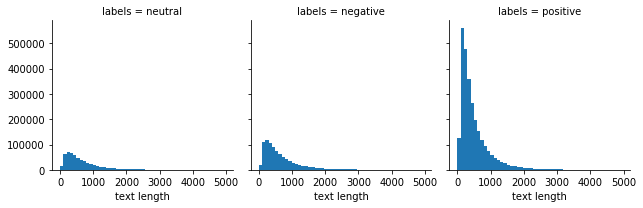

In [32]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=result,col='labels')
graph.map(plt.hist,'text length',bins=50)

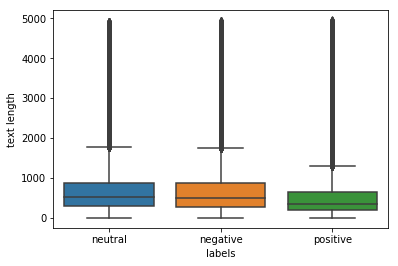

In [33]:
sns.boxplot(x='labels', y='text length', data=result)

In [34]:
text = result['removed_punct_text']
star = result['labels']

In [35]:
texts = text[:10000]
stars = star[:10000]

In [36]:
len(texts)

10000

In [37]:
len(stars)

10000

In [38]:
print(Counter(stars))

Counter({'positive': 6561, 'negative': 2081, 'neutral': 1358})


In [39]:
# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation

#vectorizer = CountVectorizer(stop_words='english')
#vectorizer = TfidfVectorizer(ngram_range=(1,2)) #,stop_words='english')
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
t1 = datetime.now()
 
# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)
print(datetime.now() - t1)

0:00:03.010425


In [40]:
X_train, X_test, y_train, y_test = train_test_split(vectors, stars, test_size=0.2, random_state=42)

In [41]:
# initialise the SVM classifier
classifier = LinearSVC()
 
# train the classifier
t1 = datetime.now()
classifier.fit(X_train, y_train)
print(datetime.now() - t1)

0:00:00.377808


In [42]:
preds = classifier.predict(X_test)
print((preds[:10]))
print((y_test[:10]))

['negative' 'positive' 'negative' 'negative' 'positive' 'positive'
 'positive' 'negative' 'positive' 'positive']
6252    negative
4684     neutral
1731    negative
4742    negative
4521    positive
6340    positive
576     positive
5202    negative
6363    positive
439     positive
Name: labels, dtype: object


In [43]:
scores = cross_val_score(classifier, vectors, stars, cv=5)
scores

array([0.81218781, 0.7895    , 0.7195    , 0.8014007 , 0.7853927 ])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.80      0.75      0.77       439
     neutral       0.47      0.23      0.31       268
    positive       0.84      0.95      0.89      1293

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.70      0.64      0.66      2000
weighted avg       0.78      0.81      0.79      2000



In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.807


In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[ 329   35   75]
 [  47   61  160]
 [  36   33 1224]]


In [92]:
print("Opposite Reviews :")
print("1." ,texts[8])
print("predicted score: " ,preds[7])
#print("actual score: " ,y_test[7])
print("")
print("2." ,texts[11])
print("predicted score: " ,preds[10])
#print("actual score: " ,y_test[10])
print("")
print("3." ,texts[17])
print("predicted score: " ,preds[16])
#print("actual score: " ,y_test[16])
print("")
print("4." ,texts[18])
print("predicted score: " ,preds[17])
#print("actual score: " ,y_test[17])
print("")
print("5." ,texts[19])
print("predicted score: " ,preds[18])
#print("actual score: " ,y_test[18])

Opposite Reviews :
1. my family and i were at emerald yesterday during the busiest point of dim sum traffic all i can say is it is total mayhem there weren't any lines during the time we were there but i believe that is because they churn through customers in a manner i have never seen before the tables are smooshed together to get as many in and out quickly i can't really blame them i get it when you have a good thing capitalize on it though this atmosphere creates a bit of a frantic assembly line feel that i don't particularly find enjoyablethere is no denying that the food at emerald is pretty good when it comes to dim sum they stand out among the rest as they offer way more options than any other restaurant their offerings are unique and plentiful in size but not in overall temperature of dish only 1 of the dishes we received were actually the temperature it needed to be again a symptom of the style of restaurant service was perfunctory at best cart servers were like street corner 

In [91]:
print("Matching Reviews : ")
print("1." ,texts[3])
print("predicted score: " ,preds[2])
#print("actual score: " ,y_test[2])
print("")
print("2." ,texts[5])
print("predicted score: " ,preds[4])
#print("actual score: " ,y_test[4])
print("")
print("3." ,texts[7])
print("predicted score: " ,preds[6])
#print("actual score: " ,y_test[6])
print("")
print("4." ,texts[10])
print("predicted score: " ,preds[9])
#print("actual score: " ,y_test[9])
print("")
print("5." ,texts[12])
print("predicted score: " ,preds[12])
#print("actual score: " ,y_test[12])

Matching Reviews : 
1. horrible servicei went there tonight with my boyfriend because hes passed by the place a couple of times and we wanted to try it out we orders bok choy chicken fried rice and some lemon chicken when we got our food the chicken was hard and looked old like it had been refried so i complained to the server he didn't even acknowledge my complaint and just left i told another server and he told me that  this is how they make it and left without even offering to provide a new one finally a women server offered to get a new one and even agreed with us that it was old but it took about 20 minutes and all we had was the rice and bok choy by the time they brought it out we just weren't hungry anymore considering we did not want to eat the chicken by itself and our rice was already cold only exception is the sweet older lady who served us the rest of servers were rude one server even went to the table beside us to check the bill to see how much tip a couple had gave after 